# Examen d'ocvx 2

## Section 1

### Question 1

In [38]:
import warnings
import math
import time
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [4]:
class test_function():
    
    def __init__(self, name, value, dim, nb_params, convex=None, grad=None, hess=None, HCN=None, constraints = None):
        self.name = name
        self.value = value
        self.dim = dim
        self.nb_params = nb_params
        self.convex = convex
        self.grad = grad
        self.hess = hess
        self.HCN = HCN
        self.constraints = constraints

In [93]:
mini_1_d = {
    "name": "mini_1",
    "dim" : 1,
    "nb_params" : 1,
    "convex" : True,
    "value" : (lambda x: np.square([x])+x+1),
    "grad"  : (lambda x: np.array([2*x + 1])),
    "hess"  : (lambda x: np.array([2])),
    "HCN"   : 1,
    "constraints": []
}

mini_1 = test_function(**mini_1_d)

In [95]:
maxi_1_d = {
    "name": "mini_1",
    "dim" : 1,
    "nb_params" : 1,
    "convex" : True,
    "value" : (lambda x: -1*np.square([x])+2*x+1),
    "grad"  : (lambda x: np.array([-2*x + 2])),
    "hess"  : (lambda x: np.array([-2])),
    "HCN"   : 1,
    "constraints": []
}

maxi_1 = test_function(**maxi_1_d)

In [208]:
#C'est la fonction de Bashar, faut changer un peu

#func_3_d = {
#    "name": "function_3",
#    "dim" : 2,
#    "nb_params" : 1,
#    "convex" : True ,
#    "value" : (lambda x: np.square([x[:, 0]]) + np.square([x[:, 1]])),#x[:, 0]**2 + gamma*x[:, 1]**2),
#    "grad"  : (lambda x: np.array([2*x[:, 0], 2*x[:, 1]]).reshape(1, -1)),
#    "hess"  : (lambda x: np.diag([2, 2])),
#    "HCN"   : (lambda x: 1),
#    "constraints" : [],
#}

#func_3 = test_function(**func_3_d)

In [197]:
exp_1_d = {
    "name": "exp_1",
    "dim" : 1,
    "nb_params" : 1,
    "convex" : True,
    "value" : (lambda x: np.array([math.exp(x)+math.exp(-x)-1])),#np.array([math.exp(x)+math.exp(-2*x)-1])
    "grad"  : (lambda x: np.array([math.exp(x)-math.exp(-x)])),#np.array([-2*math.exp(-2*x)+math.exp(x)]))
    "hess"  : (lambda x: np.array([math.exp(-x)+math.exp(x)])),#np.array([4*math.exp(-2*x)+math.exp(x)]))
    "HCN"   : 1, #jsp
    "constraints": []
}

exp_1 = test_function(**exp_1_d)

In [198]:
test_list = [mini_1, maxi_1, exp_1]

### Question 2

In [175]:
def backtracking(f, x, dir_x, alpha=0.1, beta=0.8):
    
    return 1
    t = 1

    while f.value(x+t*dir_x) > f.value(x) + alpha*t*np.transpose(f.grad(x))*dir_x:
        t = beta*t

    return t

In [187]:
def newton(f, x, epsilon=0.0001):
    
    x = x.reshape(1, -1)
    if (len(f.hess(x).shape) == 1):
        hess_inv = 1/f.hess(x)
    else:
        hess_inv = np.linalg.inv(f.hess(x))

    x_dir = -1*hess_inv*f.grad(x)
    l = abs(-1*np.transpose(f.grad(x))*x_dir)
    
    n_iter = 0
    
    while abs(l/2) > epsilon:
        
        x_dir = -1*hess_inv*f.grad(x)
        l = -1*np.transpose(f.grad(x))*x_dir
        t = backtracking(f, x, x_dir)
        x = (x+t*x_dir)
        n_iter += 1
    
    ob_val = f.value(x)
    
    return x.flatten(), ob_val.flatten(), n_iter

In [226]:
start = time.time()
newton_op_pt, newton_ob_val, newton_n_iter = newton(maxi_1, np.array(3))
print("Temps d'execution : %s secondes" % (time.time() - start))
print("Estimation : ", newton_op_pt)
print("Ob value : ", newton_ob_val)
print("Nombre d'iterations : ", newton_n_iter)

Temps d'execution : 0.0006389617919921875 secondes
Estimation :  [1.]
Ob value :  [2.]
Nombre d'iterations :  2


No handles with labels found to put in legend.


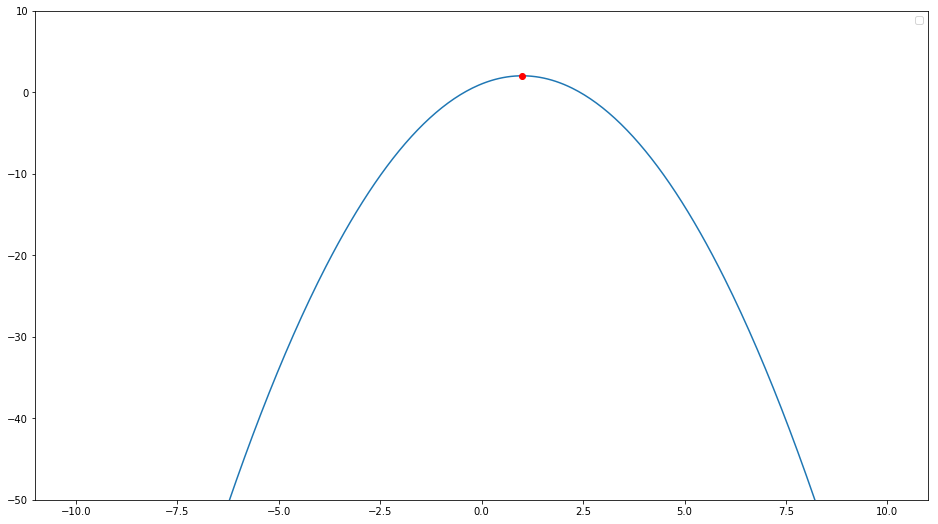

In [227]:
fig, ax = plt.subplots(figsize=(16, 9))
x = np.linspace(-10, 10, 400)
ax.set_ylim(-50, 10)
ax.plot(x, maxi_1.value(x).flatten())
#ax.set_title("Famille cubique en dimension 1")
ax.plot([newton_op_pt], [newton_ob_val], 'ro')
ax.legend()

In [228]:
start = time.time()
newton_op_pt, newton_ob_val, newton_n_iter = newton(mini_1, np.array(3))
print("Temps d'execution : %s secondes" % (time.time() - start))
print("Estimation : ", newton_op_pt)
print("Ob value : ", newton_ob_val)
print("Nombre d'iterations : ", newton_n_iter)

Temps d'execution : 0.0006110668182373047 secondes
Estimation :  [-0.5]
Ob value :  [0.75]
Nombre d'iterations :  2


No handles with labels found to put in legend.


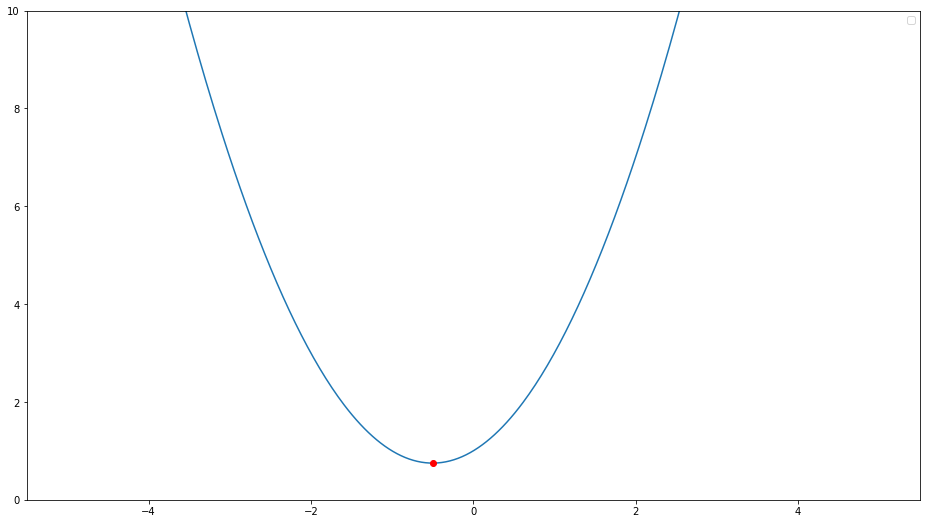

In [235]:
fig, ax = plt.subplots(figsize=(16, 9))
x = np.linspace(-5, 5, 400)
ax.set_ylim(0, 10)
ax.plot(x, mini_1.value(x).flatten())
#ax.set_title("Famille cubique en dimension 1")
ax.plot([newton_op_pt], [newton_ob_val], 'ro')
ax.legend()

### Question 3

In [178]:
# code de Bashar pour la descente de gradient

def partial(f, x, i=0, dx=1e-6):
    """Computes i-th partial derivative of f at point x.
    
    Args:
        f: objective function.
        x: point at which partial derivative is computed.
        i: coordinate along which derivative is computed.
        dx: slack for finite difference.
        
    Output:
        (float)

    """
    x = x.reshape(1, -1)
    h = np.zeros(x.shape)
    h[0, i] = dx
    return (f(x + h) - f(x - h)) / (2*dx)

def gradient(f, x, dx=1e-6):
    """Computes gradient of f at point x.
    
    Args:
        f: objective function.
        x: point at which gradient is computed.
        dx: slack for finite difference of partial derivatives.
        
    Output:
        (ndarray) of size domain of f.
        
    """
    x = x.reshape(1, -1)
    dim = x.shape[1]
    return np.array([partial(f, x, i, dx) for i in range(dim)]).reshape(1, -1)

In [183]:
quad_I_d = {
    "name": "quadratic_1",
    "dim" : 1,
    "nb_params" : 1,
    "convex" : True,
    "value" : (lambda x, gamma: gamma*(x**2) + x + 1),
    "grad"  : (lambda x, gamma: 2*gamma*x + 1),
    "hess"  : (lambda x, gamma: 2*gamma),
    "HCN"   : 1
}

quad_I = test_function(**quad_I_d)

In [184]:
class GD():
    """Gradient Descent Object.
    
    Implements gradient descent aiming to compute optimal objective 
    value of convex functions and local optimal ones of none 
    convex functions.
    
    """    
    def __init__(self, ddir=None, rate=None, decay=None, tol=None, max_iter=None):
        """        
        Instantiates a GD object.
    
        Attributes:
        ddir: function computing descent direction.
        rate: function computing learning rate ; takes in
              - x (ndarray): current iterate
              - f (function): objective function
              - dir_x (ndarray) : descent direction
              - grad (function) : gradient function
              - nb_iter (int): number of iterations.
              - eta (float): hyper-parameter.
        decay: function computing decay.
        tol: slack tolerance.
        max_iter: upper bound on number of iterations.
    
        """
        self.ddir = ddir if ddir else (lambda x, f, grad, tol: - grad(x, f, tol))
        self.rate = rate if rate else (lambda x, f, dir_x, grad, nb_iter, eta : 0.01)
        self.decay = decay if decay else (lambda x, f, grad, tol: np.linalg.norm(grad(x, f, tol)))
        self.tol = tol if tol else 1e-6
        self.max_iter = max_iter if max_iter else 1000
    
    def __call__(self, x, f, grad, verbose=False):
        """Calling gradient descent object with specific starting point and optimal function.
        
        Args:
            x: initial starting point for descent.
            f: objective function of optimisation problem.
            grad: function outputing gradient value of function f at a given point.
        
        Output:
            (float) sub-optimal value up to tolerance if execution is proper.
            (ndarray) list of gradient descent iterates.
            (ndarray) list of graidents of iterates.
            (int) number of iterations.
            
        """
        x = x.reshape(1, -1)
        eta = 0
        n_iter = 0

        dir_x = self.ddir(x, f, grad, self.tol)
        rate_ = self.rate(x, f, dir_x, grad, n_iter, eta)
        delta_x = rate_ * dir_x
        iters, iters_dir = x, delta_x
        
        decay_x = self.decay(x, f, grad, self.tol)
        while decay_x > self.tol and n_iter < self.max_iter:
            ## Deciding on direction
            dir_x = self.ddir(x, f, grad, self.tol)
            rate_ = self.rate(x, f, dir_x, grad, n_iter, eta)
            delta_x =  rate_ * dir_x
            
            # Storing iterates
            iters = np.vstack([iters, x])
            
            ## Updating iterate
            x = x + delta_x
            
            ## Storing directions
            iters_dir = np.vstack([iters_dir, delta_x])
            
            ## Computing decay
            decay_x = self.decay(x, f, grad, self.tol)
            
            ## Updating iteration number
            n_iter += 1
            
        #if decay_x > self.tol:
        #    warnings.warn("Decay didn't get under tolerance rate.", RuntimeWarning)
        
        #if verbose:
        #    msg = " Iteration nu. = {}\n approx. = {}\n ob value = {}\n and decay = {}."
        #    print(msg.format(n_iter, x.flatten(), f(x), decay_x))
        
        return (x, iters, iters_dir, n_iter) 

#### Méthode vue en TP :

In [185]:
start = time.time()
GD_default = GD()
gd_op_pt, iters, iters_dir, gd_n_iter = GD_default(np.array([10]), (lambda x : quad_I.value (x, 1)), 
                                             (lambda x, f, tol : quad_I.grad (x, 1)), True)
print("Temps d'execution : %s secondes" % (time.time() - start))
print("Estimation : ", gd_op_pt.flatten())
print("Ob value : ", quad_I.value(gd_op_pt, 1))
print("Nombre d'iterations : ", gd_n_iter)

Temps d'execution : 0.051473140716552734 secondes
Estimation :  [-0.4999995]
Ob value :  [[0.75]]
Nombre d'iterations :  835


#### Méthode de Newton :

In [219]:
start = time.time()
newton_op_pt, newton_ob_val, newton_n_iter = newton(maxi_1, np.array(3))
print("Temps d'execution : %s secondes" % (time.time() - start))
print("Estimation : ", newton_op_pt)
print("Ob value : ", newton_ob_val)
print("Nombre d'iterations : ", newton_n_iter)

Temps d'execution : 0.0006310939788818359 secondes
Estimation :  [1.]
Ob value :  [2.]
Nombre d'iterations :  2
